### Projet 4: décomposer une image sur une base d'ondelettes.

<p>PEREIRA SOUZA DIAS Isabelle</p>
SHEN Tingting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

import scipy
%matplotlib inline 

In [2]:
'''
Fonction pour créer la matrice Wd de taille nxn
Voir ex. 6 séance 1
'''
def matrix_Wd(n):
    size = (n,n)
    Wd = np.zeros(size)                          #mettre à zéro toute la matrice
    
    for i in range(0 ,n//2): 
        Wd[i, 2*i] = 1/np.float32(2)             #set the top part of the matrix to 1/2
        Wd[i , 2*i+1] = 1/np.float32(2)
        
        Wd[i + n//2, 2*i] = -1/np.float32(2)     #set the botttom half to -1/2
        Wd[i + n//2, 2*i+1] = 1/np.float32(2)   
    
    return Wd


###### Vérifier la structure de la matrice Wd avec print("Example matrice taille 8x8", matrix_Wd(n))

In [3]:
print("Example matrice taille 8x8\n", matrix_Wd(8))

Example matrice taille 8x8
 [[ 0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5  0.5]
 [-0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0.5]]


## Programmation de la transformée de Haar

### Q.1: Programmer l’algorithme obtenu à la fin de la séance 1 pour un vecteur de taille 2 q
### où q est un entier strictement positif arbitraire.

### Faire deux fonctions:
### 1) fonction pour faire la décomposition vecteur
### 2) fonction pour faire la reconstruction du vecteur décomposé

### Le vecteur qu'il faut utiliser est v = [ 7, 1, 6, 6, 3, -5, 4, 2 ] (même vecteur que la séance 1)
 

In [7]:
'''
Decomposition vecteur
input:
-vect = vecteur (il doit être un vecteur colonne)
-k = nombre de niveaux de décomposition (respecter k (<=log2(n)))
ouput:
-vec_dec = vecteur decomposé
'''
def decomposition(k,vect):  
    n = np.size(vect)
    if (k > np.log2(n)):
        print ('respecter k (<=log2(n))')          #verifier le niveaux de décomposition
    else:
        vec_dec = vect
        for i in range (0 , k):
            size = n//2**i
            A = np.identity(n);    
            A[0 : size, 0 : size] = matrix_Wd(size)
            vec_dec = np.dot(A,vec_dec)
    return vec_dec

###### Faire le test de la fonction decomposition pour voir si elle a bien décomposé chaque niveau


In [9]:
v = np.asarray([ 7, 1, 6, 6, 3, -5, 4, 2 ])
vec_rec = decomposition(3,v)
print ("Vecteur decomposé ", v, "\n", vec_rec)

Vecteur decomposé  [ 7  1  6  6  3 -5  4  2] 
 [ 3. -2.  1.  2. -3.  0. -4. -1.]


In [10]:
'''
Reconstruction vecteur
input:
- à votre choix
ouput:
-vec_rec=vecteur reconstruit (il doit être le vecteur de depart)
'''

def reconstrution(k,vect):
    n = np.size(vect)
    vec_rec = vect
    if (k > np.log2(n)):
        print ('respecter k (<=log2(n))')          #verifier le niveaux de décomposition
    else:
        for i in range(k-1,-1,-1):
            size = n//2**i
            A = np.identity(n)
            A[0 : size, 0 : size] = 2* matrix_Wd(size).T
            vec_rec = np.dot(A,vec_rec)
    return vec_rec

###### Faire le test de la fonction recomposition pour voir si elle a bien recomposé chaque niveau


In [11]:
print ("Vecteur Reconstrui", v, "\n", reconstrution(3,vec_rec))

Vecteur Reconstrui [ 7  1  6  6  3 -5  4  2] 
 [ 7.  1.  6.  6.  3. -5.  4.  2.]


### Q.2: décomposition et recomposition de l'image Lena.png jusqu'à au moins deux niveaux de décomposition
### Faire deux fonctions:
### 1) fonction pour faire la décomposition image (on est en 2D!).
### 2) fonction pour faire la reconstruction de l'image décomposée.

In [45]:
'''
Décomposition image:
input:
- à votre choix
ouput:
-im_dec=image décomposée
'''

#effectue la décomposition, K fois, d'un vecteur sur la base d'ondelettes de Haar
def decomp(tab,lignes,K):              #we made another decomp because if we don't pass the amount of lignes to
                                        #this fonction the output is not as expected
    Kb=lignes//(2**K)
    im_dec=np.zeros(lignes,float)
    n=lignes
    j=0
    while (n!=Kb):
        for i in range (0,n,2):
            im_dec[j]=(float(tab[i])+float(tab[i+1]))/2
            im_dec[j+n//2]=(-float(tab[i])+float(tab[i+1]))/2
            j=j+1
        n=n//2
        j=0
        for i in range (lignes):
            tab[i]=im_dec[i] 
    return tab

def decomposition_image(img,lignes,colonnes,K):        #decomposition 2D is the vector decompostition done twice
    Kb=lignes/(2**K)
    a=lignes/2
    im_dec=img
    while (a!=Kb):
        im_dec=im_dec.T
        for j in range (colonnes):
            im_dec[j]=decomp(im_dec[j],colonnes,1)
        im_dec=im_dec.T
        for j in range (colonnes):
            im_dec[j]=decomp(im_dec[j],colonnes,1)
        a=a/2
        colonnes=colonnes//2
    return im_dec

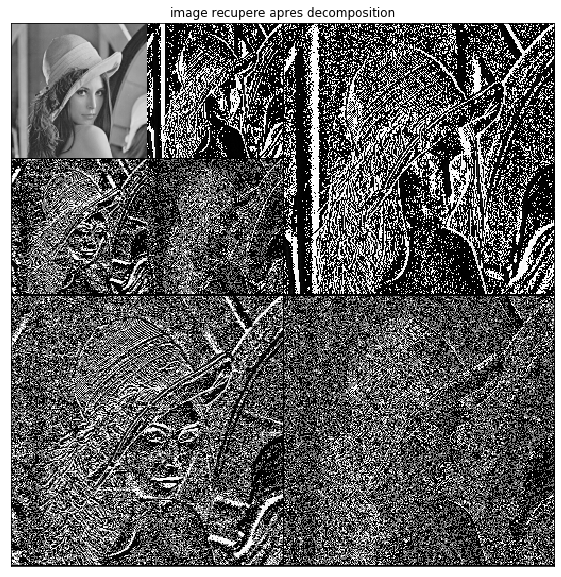

In [46]:
im = (cv2.imread('lena.png',0))
plt.figure(figsize = (10,10))
(lignes, colonnes) = im.shape
im_dec3=decomposition_image(im,lignes,colonnes,3)

    
plt.imshow(im_dec3, cmap = 'gray')
plt.title('image recupere apres decomposition'), plt.xticks([]), plt.yticks([])
plt.show() 
  

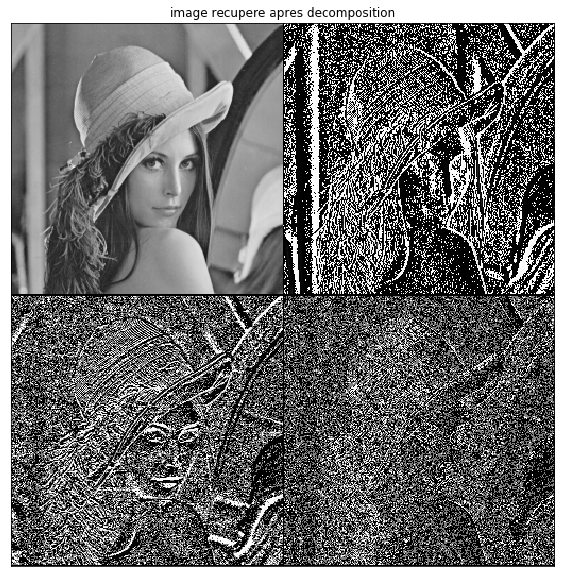

In [47]:
im = (cv2.imread('lena.png',0))
plt.figure(figsize = (10,10))
(lignes, colonnes) = im.shape
im_dec2=decomposition_image(im,lignes,colonnes,2)

    
plt.imshow(im_dec2, cmap = 'gray')
plt.title('image recupere apres decomposition'), plt.xticks([]), plt.yticks([])
plt.show() 
  

###### Faire le test de la fonction decomposition_image et montrer l'image décomposée (l'image decomposée sur 2 niveaux est similaire à l'image dans le fichier de l'ex.7 séance 1).
###### Que représente l'image décomposée?

Pour le cas des images, la decomposition est appliquée d'abord ligne par ligne, puis colonne par colonne. Certaines imagettes sont alors générées :

Le imagette en haut à gauche contient une approximation de l'image originale.

Les imagettes en ligne  en haut contient les détails horizontaux.

Les imagettes en colonne à gauche contient les détails verticaux.

Les imagettes au milieu et en bas à droite contient les détais diagonaux.

La procedure de décomposition est itérée sur l'imagette d'approximation. La figure suivante montre les imagettes obtenues par une décomposition. Cette décomposition donne une pyramide dimages de détails à différentes échelles et orientations - la décomposition en ondelettes 2D pyramidale. Quand toutes les imagettes (approximation et détails) sont encore décomposées, on obtient un arbre d'images.

In [48]:
'''
Décomposition image:
input:
- à votre choix
ouput:
-im_rec=image reconstruite
'''
def recomp(tab,lignes,K):               #we made another recomp because if we don't pass the amount of lignes to
                                        #this fonction the output is not as expected
    Kb=lignes//(2**K)
    vec_rec=np.zeros(lignes,float)
    while(Kb!=lignes):
        for i in range (Kb):
            vec_rec[2*i]=float(tab[i])-float(tab[i+Kb])
            vec_rec[2*i+1]=float(tab[i])+float(tab[i+Kb])
        Kb=Kb*2
        for i in range (Kb):
            tab[i]=vec_rec[i]  
    return tab 

def recomposition_image(img,lignes,K):   #recomposition 2D is the vector recompostition done twice
    im_rec=img
    Kb=lignes//(2**K)
    colonnes= Kb*2
    while (Kb!=lignes//2):
        colonnes=colonnes*2
        Kb=Kb*2
        im_rec=im_rec.T
        for j in range (colonnes):
            im_rec[j]=recomp(im_rec[j],colonnes,1)
        im_rec=im_rec.T
        for j in range (colonnes):
            im_rec[j]=recomp(im_rec[j],colonnes,1)
    return im_rec

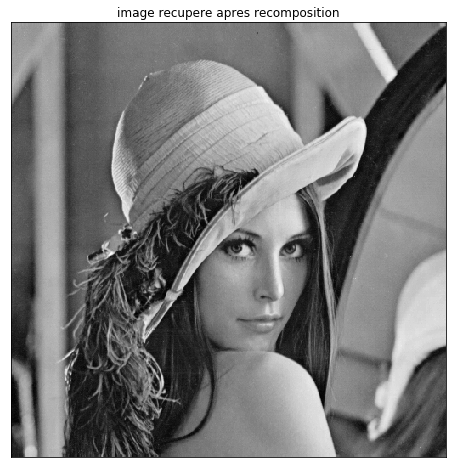

In [49]:

im_rec=recomposition_image(im_dec3,lignes1,3)
    
plt.figure(figsize = (8,8))
plt.imshow(im_rec, cmap = 'gray')
plt.title('image recupere apres recomposition'), plt.xticks([]), plt.yticks([])
plt.show() 


###### Faire le test de la fonction recomposition_image et montrer l'image recomposée.
###### Est-ce que l'image reconstruite est la même que l'image de départ ?

Après la recomposition l'image obtenue est exactement celle initial.

### Q.3: Choisir UN des trois cas. Commenter bien l'algorithme, vos choix et les résultats obtenus pour différents niveaux de décomposition.


### Cas 1: compression image
### Appliquer à l'image décomposée avec la décomposition de Haar l'algorithme de Huffman avec la fonction "huffman.py" du projet 3.  Calculer le taux de compression.


In [86]:
#Fonction pour calculer la taille de l'image apres la compressione avec le codage de Huffman
def size_compressed_image(image, k, original_size):
    """
    image = image initiale
    k = nombre de niveaux de décomposition
    original_size = taille de l image de depart
    """

    from huffman import huffman_compute #fontion Huffman deja realiser, il faut seulement l'appliquer et la telecharger 
                                        #dans le meme dossier ou vous avez le code.
    freq_dict, enc_dict = huffman_compute(image) 
    compressed_size = 0
    for i in enc_dict:

            RE=len(enc_dict[i])*freq_dict[i]
            compressed_size=RE+compressed_size

    taux=1-(compressed_size/(original_size*k))  
    
    print('Taux de compression=',taux*100,'%')
    
    return compressed_size 

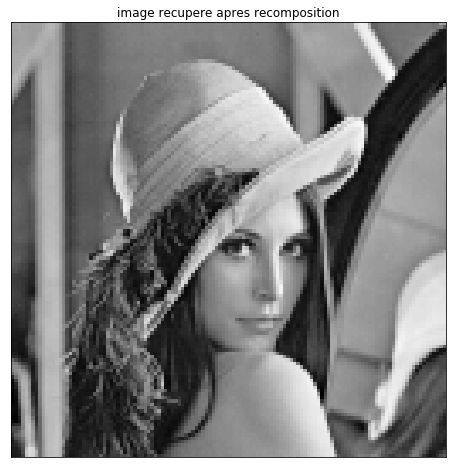


Taux de compression= 64.29308670957997 %
Size après compression= 2097152 bits



In [94]:
k=3
im = (cv2.imread('lena.png',0))
plt.figure(figsize = (8,8))
(lignes, colonnes) = im.shape
im_dec3=decomposition_image(im,lignes,colonnes,k)
 

n=lignes//(2**(k-1))
# on elimine les images hautes fréquence pour ne garder plus que notre image basse fréquence
for i in range (n,lignes) :
    for j in range (lignes):
        im[j][i]=0
for i in range (n,lignes) :
    for j in range (lignes):
        im[i][j]=0        

recomposition_image(im,lignes,k)   

plt.imshow(im, cmap = 'gray')
plt.title('image recupere apres recomposition'), plt.xticks([]), plt.yticks([])
plt.show() 

        
print()
compressed_size=size_compressed_image(recomposition_image(im,lignes1,k), k, 1957746)
print ('Size après compression=',compressed_size,'bits')
print()

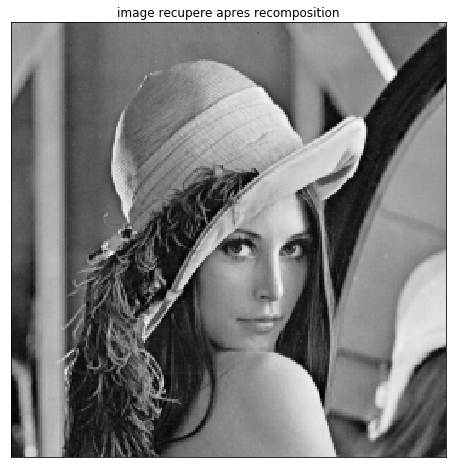


Taux de compression= 46.43963006436994 %
Size après compression= 2097152 bits



In [95]:
k=2
im = (cv2.imread('lena.png',0))
plt.figure(figsize = (8,8))
(lignes, colonnes) = im.shape
im_dec3=decomposition_image(im,lignes,colonnes,k)
 

n=lignes//(2**(k-1))
# on elimine les images hautes fréquence pour ne garder plus que notre image basse fréquence
for i in range (n,lignes) :
    for j in range (lignes):
        im[j][i]=0
for i in range (n,lignes) :
    for j in range (lignes):
        im[i][j]=0        

recomposition_image(im,lignes,k)   

plt.imshow(im, cmap = 'gray')
plt.title('image recupere apres recomposition'), plt.xticks([]), plt.yticks([])
plt.show() 

        
print()
compressed_size=size_compressed_image(recomposition_image(im,lignes1,k), k, 1957746)
print ('Size après compression=',compressed_size,'bits')
print()

Comme attendu, nous obtenons une image compressée. En effet, suite à la décomposition de l'image, on a réussi à supprimer les hautes fréquences permettant ainsi la compression avec perte du fichier.

On peut voir que la compression a bien fonctionné. En augmentant le k (nombre de niveaux de décomposition), on améliore la compression mais on diminue la netteté de l'image.